## Accidents analysis

#### Contents:

Data preparation:

- Load accidents dataset
- Correctly encode NA's
- Create proper time column
- Map values in columns to meaningful ones
- Change columns names to meaningful ones

EDA:

- Check shapes, NA's
- Univariat analysis - plots etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

# vehicles = pd.read_csv('data/vehicles.csv', low_memory = False)
# places = pd.read_csv('data/places.csv', low_memory = False)
# users = pd.read_csv('data/users.csv', low_memory = False)

In [3]:
places = pd.read_csv('data/places.csv', low_memory = False, encoding = 'latin-1',
                       dtype= str)

In [4]:
places.dtypes

Num_Acc    object
catr       object
voie       object
v1         object
v2         object
circ       object
nbv        object
pr         object
pr1        object
vosp       object
prof       object
plan       object
lartpc     object
larrout    object
surf       object
infra      object
situ       object
env1       object
dtype: object

In [5]:
places.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3,39,NaN,NaN,2,0,NaN,NaN,0,1,3,0,0,1,0,1,0
1,201600000002,3,39,NaN,NaN,1,0,NaN,NaN,0,1,2,0,58,1,0,1,0
2,201600000003,3,1,NaN,NaN,2,2,NaN,NaN,0,1,3,0,68,2,0,3,99
3,201600000004,4,0,NaN,NaN,2,0,NaN,NaN,0,1,1,0,0,1,0,1,99
4,201600000005,4,0,NaN,NaN,0,0,NaN,NaN,0,0,1,0,0,1,0,1,3


Loaction columns (like road number) are not needed. Dropping them.

In [6]:
cols_to_drop = ["voie", "v1", "v2", "pr", "pr1", "env1", "lartpc", "larrout"]
places.drop(cols_to_drop, axis = 1, inplace = True)

In [7]:
places.isna().sum()/places.shape[0]*100

Num_Acc    0.000000
catr       0.000119
circ       0.095002
nbv        0.213099
vosp       0.195242
prof       0.126312
plan       0.128098
surf       0.121074
infra      0.152146
situ       0.119288
dtype: float64

Very few NA's (less than 2% in each)

In [8]:
places.head()

,Num_Acc,catr,circ,nbv,vosp,prof,plan,surf,infra,situ
0,201600000001,3,2,0,0,1,3,1,0,1
1,201600000002,3,1,0,0,1,2,1,0,1
2,201600000003,3,2,2,0,1,3,2,0,3
3,201600000004,4,2,0,0,1,1,1,0,1
4,201600000005,4,0,0,0,0,1,1,0,1


In [9]:
places.nbv.unique()

array(['0', '2', '1', '4', '3', nan, '5', '6', '10', '8', '12', '7', '13',
       '11', '9', '50', '20', '30', '31', '26', '40', '15', '21', '53',
       '90', '70', '44', '60', '16', '22', '14', '24', '25', '23', '76',
       '86', '91', '28', '45', '52', '33', '41', '36', '65', '42', '17',
       '99', '27', '62', '29', '54', '39', '84', '18'], dtype=object)

In [10]:
places.groupby("nbv").agg({"Num_Acc": "count"}).sort_values("Num_Acc", ascending = False)

,Num_Acc
nbv,
2,464716
0,102796
1,101345
4,76934
3,66252
6,13945
5,7839
8,2332
7,840


Number of traffic lanes looks f*** up - contains 0's, but also 99. Converting everything > 10 and = 0 to nan

In [11]:
places["nbv"] = places.nbv.astype(float)
places["nbv"] = places.apply(lambda x: np.nan if x.nbv > 10 or x.nbv == 0 else x.nbv, axis = 1)

Now I'm mapping values of the columns to meaningful ones

In [12]:
places.columns

Index(['Num_Acc', 'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf',
       'infra', 'situ'],
      dtype='object')

In [13]:
import mappings
# A file with dictionaries containing columns values mappings

In [14]:
places["catr"] = places["catr"].map(mappings.catr_map)
places["circ"] = places["circ"].map(mappings.circ_map)
places["vosp"] = places["vosp"].map(mappings.vosp_map)
places["prof"] = places["prof"].map(mappings.prof_map)
places["plan"] = places["plan"].map(mappings.plan_map)
places["surf"] = places["surf"].map(mappings.surf_map)
places["infra"] = places["infra"].map(mappings.infra_map)
places["situ"] = places["situ"].map(mappings.situ_map)


In [15]:
places.head(3)

,Num_Acc,catr,circ,nbv,vosp,prof,plan,surf,infra,situ
0,201600000001,Departmental Road,Bidirectional,NaN,NaN,Dish,Curved right,normal,NaN,On the road
1,201600000002,Departmental Road,One way,NaN,NaN,Dish,Curved on the left,normal,NaN,On the road
2,201600000003,Departmental Road,Bidirectional,2.0,NaN,Dish,Curved right,wet,NaN,On the verge


Changing columns names for readable in english

In [16]:
places.columns

Index(['Num_Acc', 'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf',
       'infra', 'situ'],
      dtype='object')

In [17]:
colnames_map = {
    "Num_Acc": "accident_id",
    "catr": "road_category",
    "circ": "road_regime",
    "nbv": "no_lanes",
    "vosp": "reserved_lane",
    "prof": "road_gradient",
    "plan": "road_plan",
    "surf": "road_condition",
    "infra": "infrastructure",
    "situ": "accident_situation",
               }

In [18]:
places = places.rename(colnames_map, axis = 1)

In [19]:
places["no_lanes"] = places.no_lanes.astype(float)

#### EDA

In [20]:
places.head()

,accident_id,road_category,road_regime,no_lanes,reserved_lane,road_gradient,road_plan,road_condition,infrastructure,accident_situation
0,201600000001,Departmental Road,Bidirectional,NaN,NaN,Dish,Curved right,normal,NaN,On the road
1,201600000002,Departmental Road,One way,NaN,NaN,Dish,Curved on the left,normal,NaN,On the road
2,201600000003,Departmental Road,Bidirectional,2.0,NaN,Dish,Curved right,wet,NaN,On the verge
3,201600000004,Communal Way,Bidirectional,NaN,NaN,Dish,Straight part,normal,NaN,On the road
4,201600000005,Communal Way,NaN,NaN,NaN,NaN,Straight part,normal,NaN,On the road


In [21]:
places.shape

(839985, 10)

In [22]:
places.accident_id.nunique()

839985

Accident id is unique. Good.

Testing percentage number of NA's

In [23]:
places.isna().sum()/places.shape[0]*100

accident_id            0.000000
road_category          0.000119
road_regime            5.399382
no_lanes              12.527248
reserved_lane         93.889891
road_gradient          7.732876
road_plan              7.014768
road_condition         3.335179
infrastructure        89.197188
accident_situation     5.273070
dtype: float64

Reserved_lane and infrastructure are mostly empty - there is no sense in using them, probably won't bring much to prediction

In [24]:
sns.set()

##### Road category

Text(0.5, 1.0, 'Type of road')

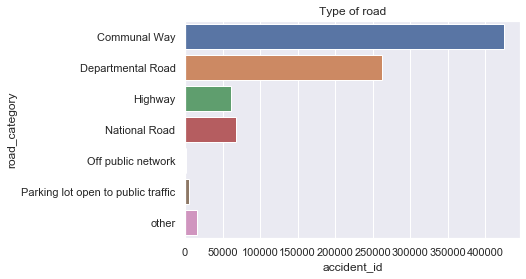

In [25]:
a = places.groupby("road_category").count().reset_index()
sns.barplot(x = "accident_id", y = "road_category", data = a).set_title("Type of road")

In [26]:
places.columns

Index(['accident_id', 'road_category', 'road_regime', 'no_lanes',
       'reserved_lane', 'road_gradient', 'road_plan', 'road_condition',
       'infrastructure', 'accident_situation'],
      dtype='object')

##### Road regime

Text(0.5, 1.0, 'Road regimeroad_regime')

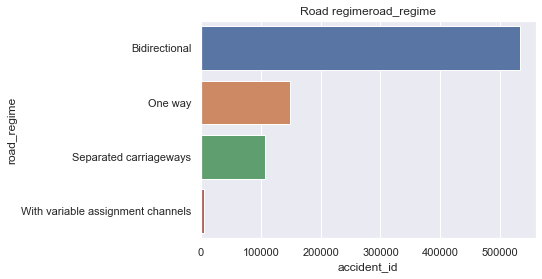

In [27]:
a = places.groupby("road_regime").count().reset_index()
sns.barplot(x = "accident_id", y = "road_regime", data = a).set_title("Road regimeroad_regime")

##### Number of lanes

Text(0.5, 1.0, 'Number of lanes')

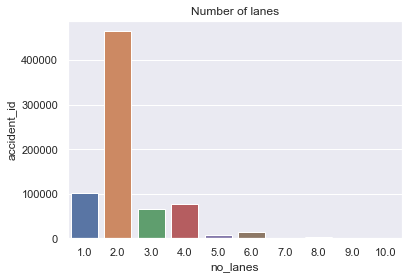

In [28]:
a = places.groupby("no_lanes").count().reset_index()
sns.barplot(y = "accident_id", x = "no_lanes", data = a).set_title("Number of lanes")

##### Road regime

Text(0.5, 1.0, 'Road regimeroad_regime')

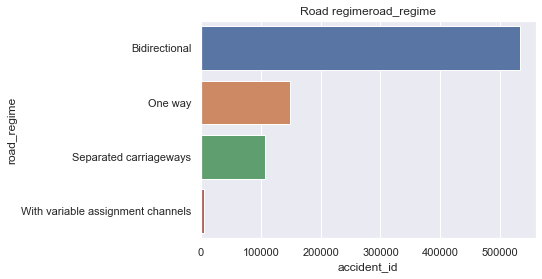

In [29]:
a = places.groupby("road_regime").count().reset_index()
sns.barplot(x = "accident_id", y = "road_regime", data = a).set_title("Road regimeroad_regime")

In [30]:
places.dtypes

accident_id            object
road_category          object
road_regime            object
no_lanes              float64
reserved_lane          object
road_gradient          object
road_plan              object
road_condition         object
infrastructure         object
accident_situation     object
dtype: object

##### Road gradient

Text(0.5, 1.0, 'Gradient')

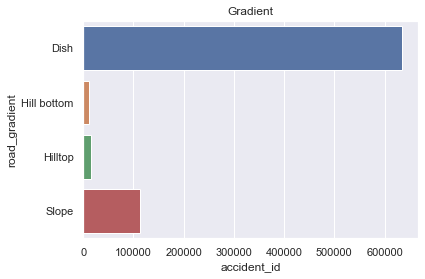

In [31]:
a = places.groupby("road_gradient").count().reset_index()
sns.barplot(x = "accident_id", y = "road_gradient", data = a).set_title("Gradient")

Road plan

Text(0.5, 1.0, 'Type of curvature')

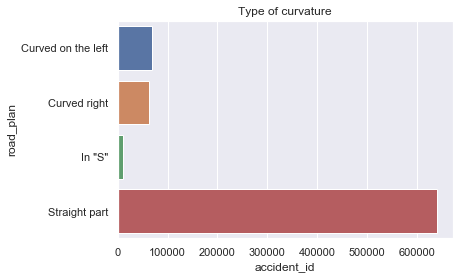

In [32]:
a = places.groupby("road_plan").count().reset_index()
sns.barplot(x = "accident_id", y = "road_plan", data = a).set_title("Type of curvature")

#### Road condition

Text(0.5, 1.0, 'Road condition')

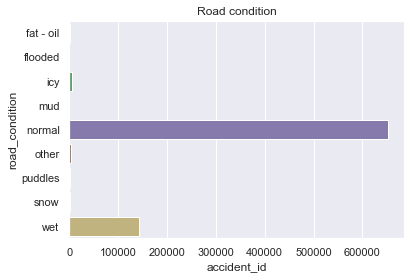

In [33]:
a = places.groupby("road_condition").count().reset_index()
sns.barplot(x = "accident_id", y = "road_condition", data = a).set_title("Road condition")

#### Infrastucture

Text(0.5, 1.0, 'Infrastructure')

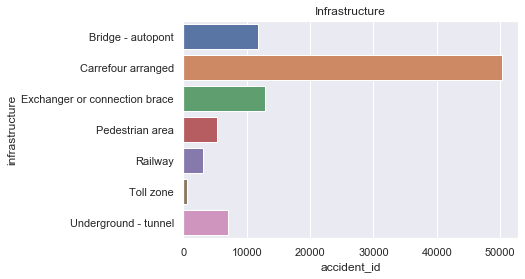

In [34]:
a = places.groupby("infrastructure").count().reset_index()
sns.barplot(x = "accident_id", y = "infrastructure", data = a).set_title("Infrastructure")

In [35]:
places.to_pickle('data/places_preprocessed.pkl')

# places = read_pickle('data/places_preprocessed.pkl')

#### Summary and final remarks